[![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)](https://fixelalgorithms.gitlab.io/)

# Dimensionality Reduction - Isomap, Laplacian Eigenmaps, t-SNE

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 0.1.000 | 01/10/2022 | Royi Avital | First version                                                      |
|         |            |             |                                                                    |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/IntroductionMachineLearningSystemEngineers/DimensionalityReductionTSNE.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import load_wine, load_breast_cancer, load_digits
from sklearn.manifold import TSNE, SpectralEmbedding, Isomap
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Misc
import datetime
import math
import os
from platform import python_version
import random
import warnings
import yaml

# Typing
from typing import Tuple

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

In [2]:
# Configuration
%matplotlib inline

warnings.filterwarnings("ignore")

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme
sns.set_palette("tab10")

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
if runInGoogleColab:
    !pip install umap-learn

from umap import UMAP

In [4]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [5]:
# Fixel Algorithms Packages


In [6]:
# Parameters

lData      = [load_breast_cancer, load_wine, load_digits]
lDataStr   = ['Breast Cancer', 'Wine', 'Digits'] 

lMethod    = [Isomap(), SpectralEmbedding(), TSNE(), UMAP()]
lMethodStr = ['Isomap', 'Laplacian Eigenmaps', 'TSNE', 'UMAP']
lC         = ['r', 'g', 'b']

In [7]:
# Auxiliary Functions

OrdinalNum = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])



## Analyze Data


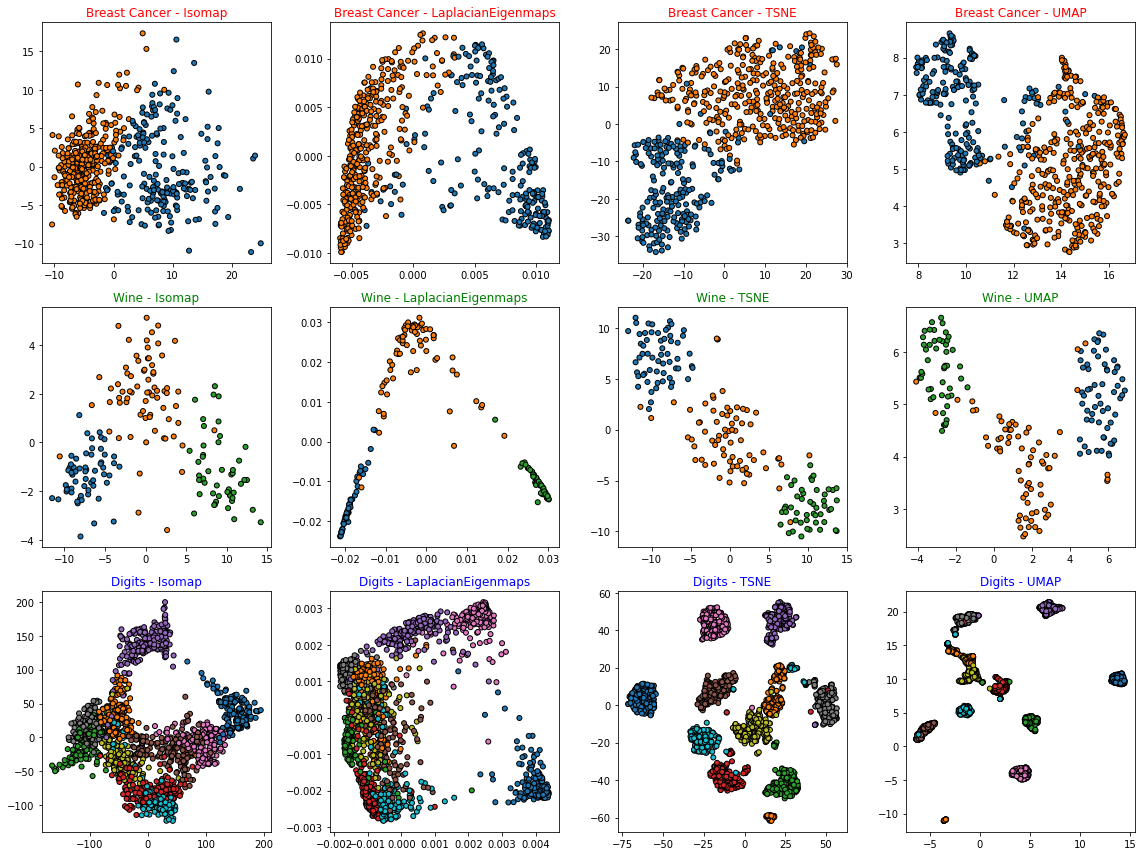

In [8]:
hF, hA = plt.subplots(3, 4, figsize = (16, 12))

for ii, Data in enumerate(lData):
    mX, vY = Data(return_X_y = True)
    
    if lDataStr[ii] != 'Digits':
        mX = StandardScaler().fit_transform(mX)
    
    for jj, oMethod in enumerate(lMethod):
        mZ = oMethod.fit_transform(mX)
        
        hA[ii, jj].scatter(*mZ.T, s = 25, c = vY, edgecolor = 'k', cmap = 'tab10', vmin = -1/2, vmax = 9.5)                         
        hA[ii, jj].set_title(f'{lDataStr[ii]} - {lMethodStr[jj]}', color = lC[ii])
    
plt.tight_layout()
plt.show()